In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
major_city_temps = pd.read_csv('cleaned_major_city_temperatures.csv') 
state_temps = pd.read_csv('cleaned_state_temperatures.csv')  

print("======Major City======")
print(major_city_temps.describe())

print("======State======")
print(state_temps.describe())



======Major City======
       averagetemperature  averagetemperatureuncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000
======State======
       averagetemperature  averagetemperatureuncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                      

In [ ]:
# Step 1: Parse datetime and extract year
def prepare_data(df, region_column):
    df['Year'] = pd.to_datetime(df['dt'], errors='coerce').dt.year
    # Group by year and calculate mean temperature
    avg_temp = df.groupby('Year')['averagetemperature'].mean().reset_index()
    avg_temp['Region'] = region_column
    return avg_temp

# Step 2: Prepare datasets
major_city_avg = prepare_data(major_city_temps, "Major Cities")
state_avg = prepare_data(state_temps, "States")

# Combine the datasets for comparison
comparison_data = pd.concat([major_city_avg, state_avg])

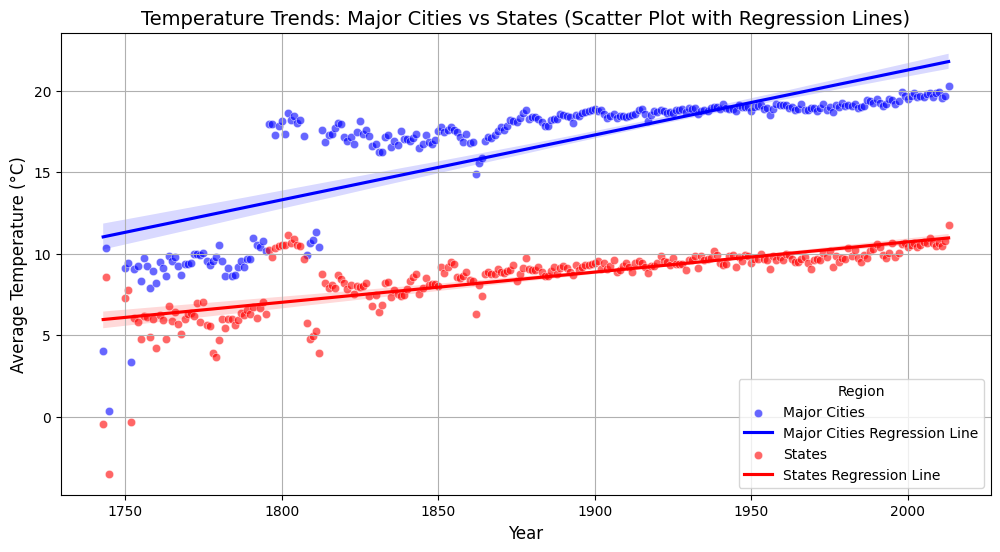

In [14]:
# Scatter plot for comparing temperature trends with regression lines
plt.figure(figsize=(12, 6))

# Scatter plot and regression line for Major Cities
sns.scatterplot(data=major_city_avg, x='Year', y='averagetemperature', label='Major Cities', color='blue', alpha=0.6)
sns.regplot(data=major_city_avg, x='Year', y='averagetemperature', scatter=False, color='blue', label='Major Cities Regression Line')

# Scatter plot and regression line for States
sns.scatterplot(data=state_avg, x='Year', y='averagetemperature', label='States', color='red', alpha=0.6)
sns.regplot(data=state_avg, x='Year', y='averagetemperature', scatter=False, color='red', label='States Regression Line')

# Graph details
plt.title("Temperature Trends: Major Cities vs States (Scatter Plot with Regression Lines)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.legend(title="Region", fontsize=10)
plt.grid(True)

# Show the scatter plot with regression lines
plt.show()


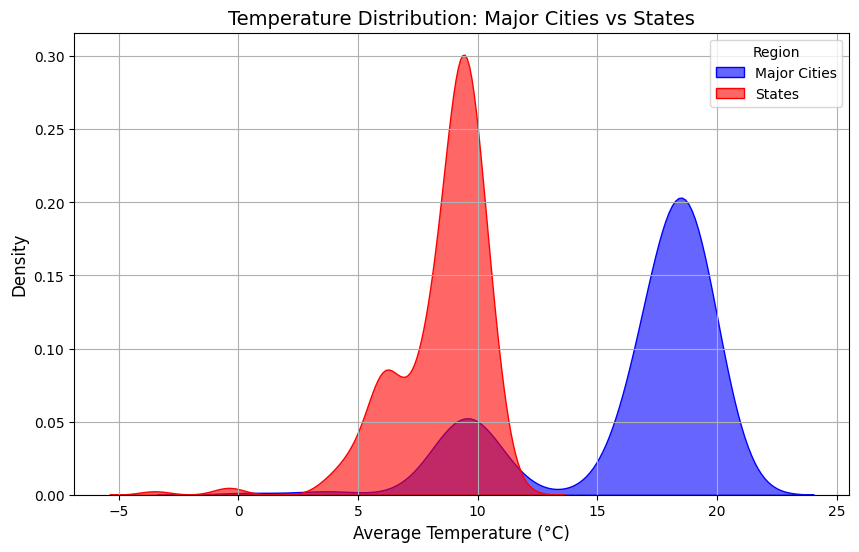

In [15]:
plt.figure(figsize=(10, 6))

# KDE plots for both regions
sns.kdeplot(data=major_city_avg['averagetemperature'], label='Major Cities', fill=True, color='blue', alpha=0.6)
sns.kdeplot(data=state_avg['averagetemperature'], label='States', fill=True, color='red', alpha=0.6)

# Graph details
plt.title("Temperature Distribution: Major Cities vs States", fontsize=14)
plt.xlabel("Average Temperature (°C)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Region", fontsize=10)
plt.grid(True)
plt.show()
